# Introduction to Wine Quality Prediction
Wine quality prediction is a fascinating application of machine learning in the field of viticulture, where chemical properties of wine are analyzed to predict its quality. This task leverages machine learning techniques to uncover patterns and relationships between the chemical composition of wine and its quality ratings, providing valuable insights for winemakers, distributors, and consumers.

# Objective
The primary goal of this project is to develop a classification model that predicts the quality of wine based on its chemical characteristics, such as acidity, alcohol content, citric acid, and density. The predicted quality serves as a measure of the wine's desirability, enabling targeted quality improvement and better decision-making in production and marketing.



# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Step 2: Load the Dataset

In [2]:
url = "WineQT.csv"
data = pd.read_csv(url)

# View the first few rows
print(data.head())

# Check basic information
print(data.info())
print(data.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

# Step 3: Check for Missing Values

In [3]:
print(data.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Step 4: Exploratory Data Analysis (EDA)

Distribution of Wine Quality

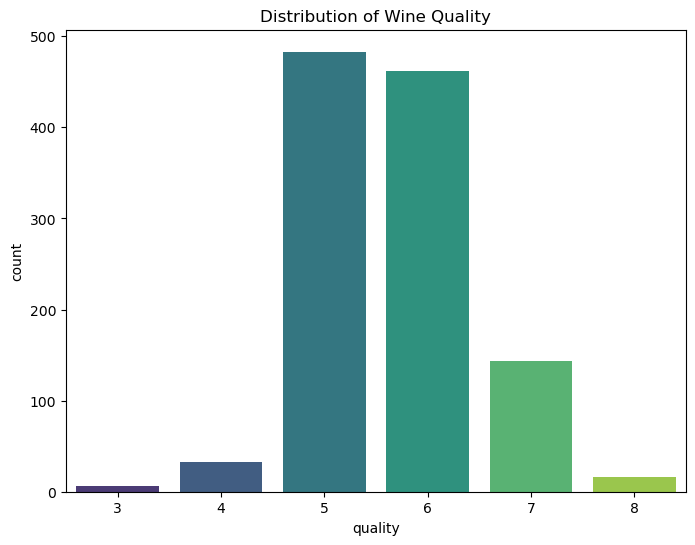

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.show()


Correlation Heatmap

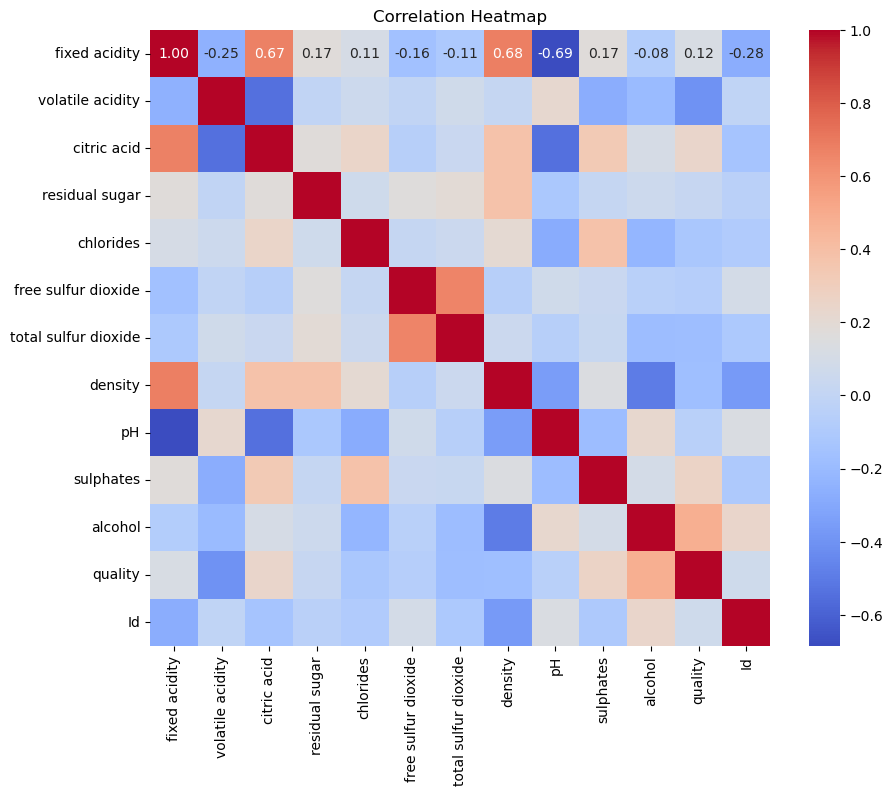

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Step 5: Prepare Features and Target

In [6]:
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target


# Step 6: Split the Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 7: Standardize the Features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 8: Train Classifier Models

Random Forest

In [9]:
# Adjust class weights
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Accuracy: 0.6768558951965066
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.74      0.72        96
           6       0.63      0.68      0.65        99
           7       0.74      0.65      0.69        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.65      0.68      0.67       229



 Stochastic Gradient Descent

In [10]:
# Train the SGD Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

# Make predictions
y_pred_sgd = sgd.predict(X_test)

# Evaluate performance
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report:\n", classification_report(y_test, y_pred_sgd, zero_division=0))


SGD Classifier Accuracy: 0.5851528384279476
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229



Support Vector Classifier

In [11]:
# Train the SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Evaluate performance
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc, zero_division=0))


SVC Accuracy: 0.6550218340611353
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229



Best-Performing Model: Random Forest Classifier
Random Forest has the highest accuracy (67.25%) and weighted F1-score (0.66), making it the best-performing model overall.
It balances predictive power across majority classes better than SVC and SGD.

# Step 9: Hyperparameter Tuning 

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Random Forest Accuracy: 0.6681222707423581


# Step 10: Visualize Feature Importance

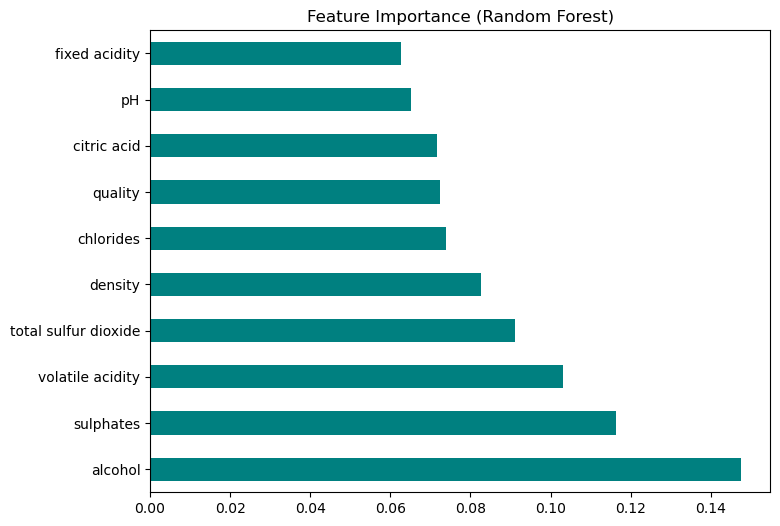

In [13]:
plt.figure(figsize=(8, 6))
feat_importances = pd.Series(best_rf.feature_importances_, index=data.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.show()


# conclusion 
Based on the feature importance plot generated by the Random Forest model, alcohol emerges as the most significant factor in determining wine quality, followed closely by volatile acidity. These findings align with winemaking knowledge, as alcohol content is a key contributor to flavor and body, while high volatile acidity can lead to off-flavors. Other influential features include sulphates and citric acid, which contribute to mouthfeel and complexity. Features like fixed acidity, pH, and chlorides, while still relevant, appear to have a less pronounced impact on wine quality according to this model. This analysis provides valuable insights into the relative importance of various chemical properties in wine quality assessment, emphasizing the crucial role of alcohol and volatile acidity in achieving high-quality wines.